In [2]:
import jpt
from jpt import (
    alex,
    cris,
    load_jeopardy_dataset,
    jeopardy_benchmark,
    evaluate_jeopardy_benchmarks,
    plot_evaluations
)
import pandas as pd
import os

In [23]:
%load_ext autoreload
%autoreload 2

In [4]:
jeopardy_data = load_jeopardy_dataset(remove_unfair=True)

In [6]:
cris_benchmark_results_df1 = jeopardy_benchmark(
    contestant=cris,
    dataset=jeopardy_data,
    sample_size=250)

..........................................................................................................................................................................................................................................................

In [50]:
cris_benchmark_results_df2 = jeopardy_benchmark(
    contestant=cris,
    dataset=jeopardy_data,
    sample_size=750)

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [66]:
# Hit the rate limit! I knew it!
cris_benchmark_results_df3 = jeopardy_benchmark(
    contestant=cris,
    dataset=jeopardy_data,
    sample_size=1000)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [67]:
cris_benchmark_results_df = pd.concat([
    cris_benchmark_results_df1,
    cris_benchmark_results_df2,
    cris_benchmark_results_df3
])
cris_benchmark_results_df['label'] = 'cris'

In [68]:
old_benchmark_results_df = pd.read_csv(os.path.join(jpt.JEOPARDY_DATA_DIR, r'all_benchmark_results_2024-05-13.csv'))
old_benchmark_results_df.shape

(14000, 8)

In [69]:
all_benchmark_results_df = pd.concat([
    old_benchmark_results_df, 
    cris_benchmark_results_df
])
all_benchmark_results_df.shape

(16000, 8)

In [70]:
jeopardy_benchmark_evaluations_df = evaluate_jeopardy_benchmarks(all_benchmark_results_df)
jeopardy_benchmark_evaluations_df

,label,successes,failures,sample_size,success_rate,standard_error,name
1,ken,1924,76,2000,0.9620,0.004288,Ken Jennings\ngpt-4-turbo
7,cris,1917,83,2000,0.9585,0.004471,Cris Pannullo\ngpt-4-o
0,amy,1856,144,2000,0.9280,0.005788,Amy Schneider\ngpt-3.5\nfine-tuned
5,james,1791,209,2000,0.8955,0.006846,James Holzhauer\ngpt-3.5-turbo
4,brad,1790,210,2000,0.8950,0.006860,Brad Rutter\nllama3:70b
6,mattea,1567,433,2000,0.7835,0.009212,Mattea Roach\nllama3:8b\nRAG
2,larissa,1257,743,2000,0.6285,0.010805,Larissa Kelly\nllama3:8b
3,david,1196,804,2000,0.5980,0.010964,David Madden\nllama2:7b


In [71]:
df = jeopardy_benchmark_evaluations_df.copy()
df.reset_index(drop=True, inplace=True)

# split name/model into separate columns
name_split = df['name'].str.split('\n', expand=True)
df.insert(0, 'variation', name_split[2])
df.insert(0, 'model', name_split[1])
df.insert(0, 'Contestant', name_split[0])
df.drop(columns=['label', 'name'], inplace=True)

# formatting
df['successes'] = df['successes'].apply(lambda x: f'{x:,}')
df['failures'] = df['failures'].apply(lambda x: f'{x:,}')
df['sample_size'] = df['sample_size'].apply(lambda x: f'{x:,}')
df['success_rate'] = df['success_rate'].apply(lambda p: f'{p*100:0.2f}%')
df['standard_error'] = df['standard_error'].apply(lambda p: f'±{p*196:0.2f}%')

df.columns = ['Contestant', 'Model', 'Variation', 'Successes', 'Failures', 'Sample Size', 'Success Rate', '95% CI']
print(df.to_markdown(index=False))

| Contestant      | Model         | Variation   | Successes   |   Failures | Sample Size   | Success Rate   | 95% CI   |
|:----------------|:--------------|:------------|:------------|-----------:|:--------------|:---------------|:---------|
| Ken Jennings    | gpt-4-turbo   |             | 1,924       |         76 | 2,000         | 96.20%         | ±0.84%   |
| Cris Pannullo   | gpt-4-o       |             | 1,917       |         83 | 2,000         | 95.85%         | ±0.88%   |
| Amy Schneider   | gpt-3.5       | fine-tuned  | 1,856       |        144 | 2,000         | 92.80%         | ±1.13%   |
| James Holzhauer | gpt-3.5-turbo |             | 1,791       |        209 | 2,000         | 89.55%         | ±1.34%   |
| Brad Rutter     | llama3:70b    |             | 1,790       |        210 | 2,000         | 89.50%         | ±1.34%   |
| Mattea Roach    | llama3:8b     | RAG         | 1,567       |        433 | 2,000         | 78.35%         | ±1.81%   |
| Larissa Kelly   | llama3:8b   

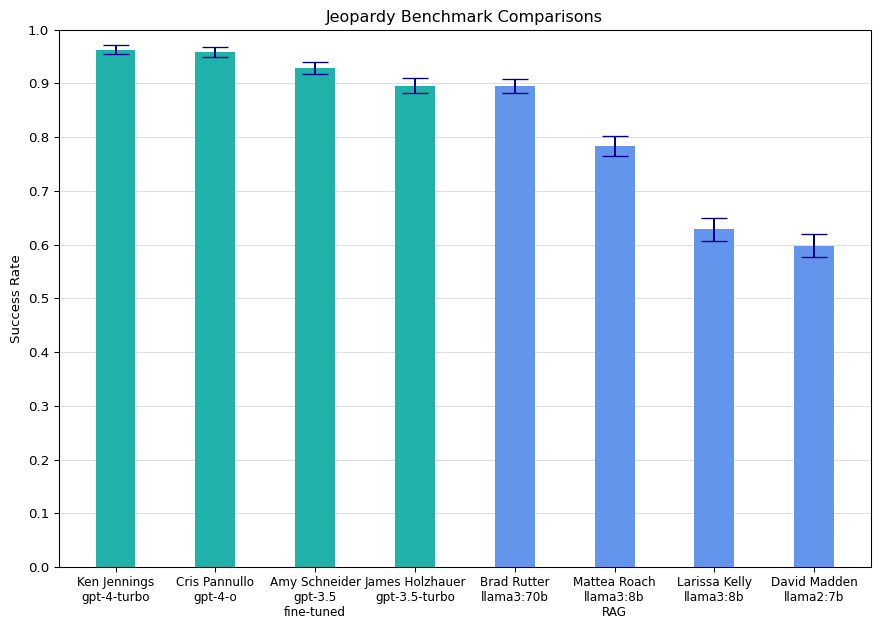

In [72]:
# Plotting the bar chart with error bars
plot_evaluations(jeopardy_benchmark_evaluations_df)

In [73]:
from util import now
timestamp = now(False)
eval_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'jeopardy_benchmark_evaluations_{timestamp}.csv')
print('wrote', eval_filename)
jeopardy_benchmark_evaluations_df.to_csv(eval_filename, index=False)

benchmark_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'all_benchmark_results_{timestamp}.csv')
all_benchmark_results_df.to_csv(benchmark_filename, index=False)
print('wrote', benchmark_filename)

wrote C:\Users\oloon\Dropbox\data\jeopardy\jeopardy_benchmark_evaluations_2024-05-14.csv
wrote C:\Users\oloon\Dropbox\data\jeopardy\all_benchmark_results_2024-05-14.csv
